# ECG filtering

This notebook presents an example on how to filter an ECG signal using the SciPy library. We will also use `matplotlib` to visualize some interesting properties of the data. The ECG signal, available as part of the course material from the [biomedical signal and image processing course from MIT](https://ocw.mit.edu/courses/hst-582j-biomedical-signal-and-image-processing-spring-2007/), was picked up by surface electrodes on the patient, amplified with a gain of 1000, analogically filtered to include frequencies between 0.1 Hz and 100 Hz, sampled at 250 Hz and finally quantized to 16 bits.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

from scipy import signal


The data set consists of a text file where each line contains the sample time (in seconds) and the recorded ECG signal (in Volts). The patient was quiet during the first four minutes of the recording, while he periodically contracted his chest muscles during the last minute to add some noise to the data.

In [2]:
data_file = open('ecg-signal.txt', 'r')

sample_time = []
recorded_ecg = []

for line in data_file:
    line = line.replace("  ", " ")
    line_parts = line.split(" ")

    sample_time.append(float(line_parts[1]))

    line_parts[2] = line_parts[2].replace("\n", "")
    recorded_ecg.append(float(line_parts[2]))
    

The code below plots a 6-second segment of the clean data.

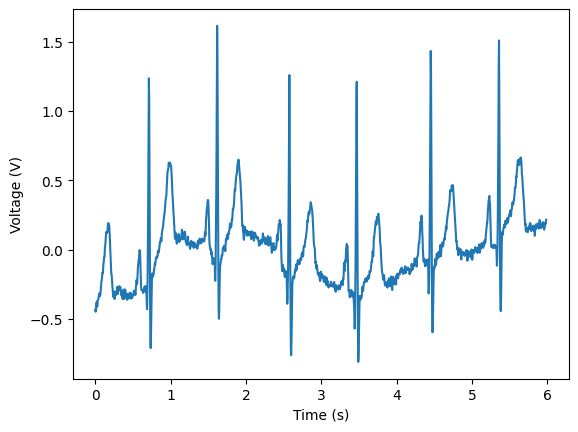

In [3]:
plt.plot(sample_time[:1500], recorded_ecg[:1500])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

We also plot a 6-second segment of the noisy signal to show the difference.

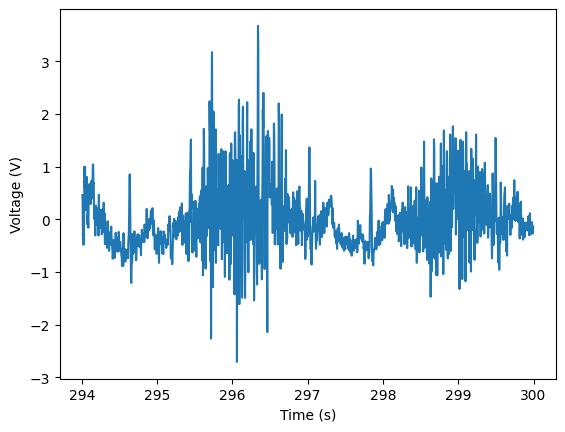

In [4]:
plt.plot(sample_time[len(recorded_ecg)-1500:], recorded_ecg[len(recorded_ecg)-1500:])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

The power spectral density (PSD) of the signals, calculated in our case using the Welch's method, help to examine their frequency content and consequently design an appropriate digital filter.

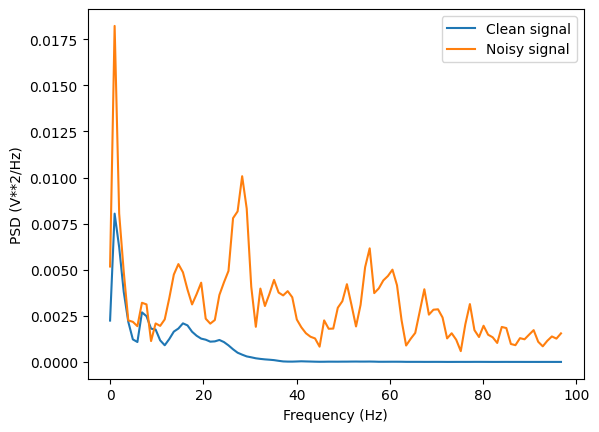

In [5]:
freq, psd = signal.welch(recorded_ecg[:1500], fs=250)
plt.plot(freq[:100], psd[:100], label="Clean signal")

freq, psd = signal.welch(recorded_ecg[len(recorded_ecg)-1500:], fs=250)
plt.plot(freq[:100], psd[:100], label="Noisy signal")

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)')
plt.legend(loc='upper right')
plt.show()

Based on the signals' PSDs, we design a bandpass Butterworth filter of order 15 to remove baseline fluctuations and attenuate high-frequency noise. The cutoff frequencies were set to 0.3 Hz and 40 Hz, respectively, to preserve most of the energy in the signal (area under the blue curve). The plot below shows the resulting PSDs after we apply the filter to the signal (note all frequencies outside the passing range were vanished from the data).

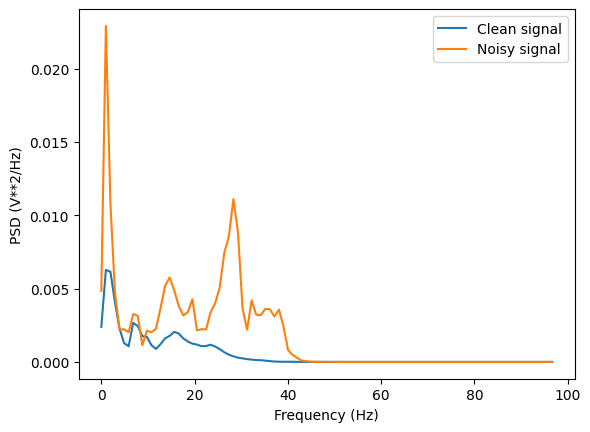

In [6]:
sos = signal.butter(15, [0.3,40], 'bp', fs=250, output='sos')
filtd = signal.sosfilt(sos, recorded_ecg)

freq, psd = signal.welch(filtd[:1500], fs=250)
plt.plot(freq[:100], psd[:100], label='Clean signal')

freq, psd = signal.welch(filtd[len(filtd)-1500:], fs=250)
plt.plot(freq[:100], psd[:100], label='Noisy signal')

plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)')
plt.legend(loc='upper right')
plt.show()

If we plot the clean signal again, we can observe it looks more similar to the standard ECGs.

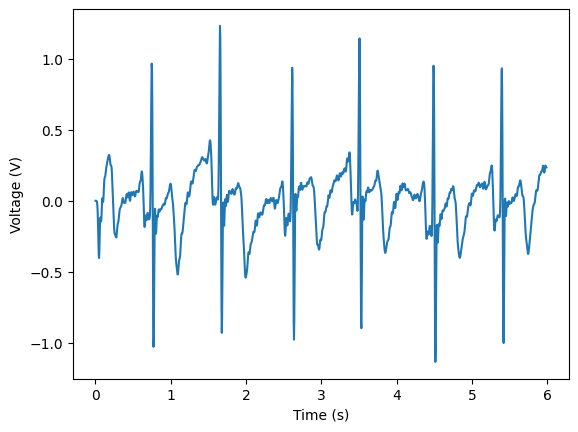

In [7]:
plt.plot(sample_time[:1500], filtd[:1500])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()

The noisy signal is still useless though, meaning the noise keeps compromising the actual information encoded in the data. We will continue investigating to come up with a better filter.

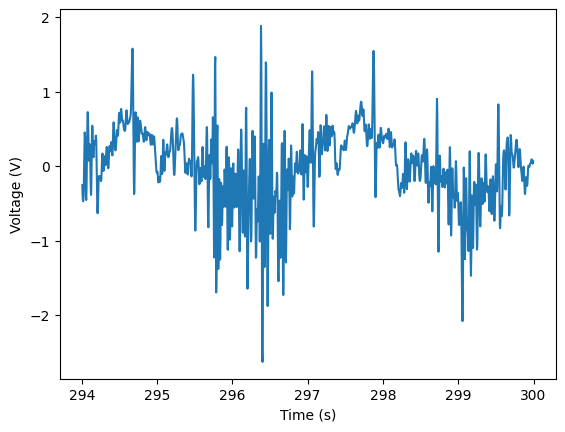

In [8]:
plt.plot(sample_time[len(filtd)-1500:], filtd[len(filtd)-1500:])
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.show()